In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv("scopus.csv")

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# nltk.download('stopwords')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [ ]:
titulos = str
for titulo in data["Abstract"]:
    titulos = titulo + " " + str(titulos)
titulos

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [ ]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [ ]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [ ]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

freq
fuzzy     2441
learning  2079
data      1686
using     1605
machine   1572
system    1476
based     1205
logic     1171
proposed  1134
model     1093

In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

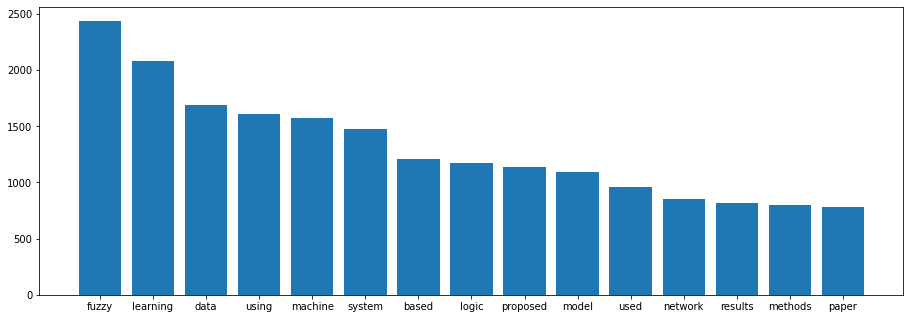

In [ ]:
plot_bar(data=df, top=15)

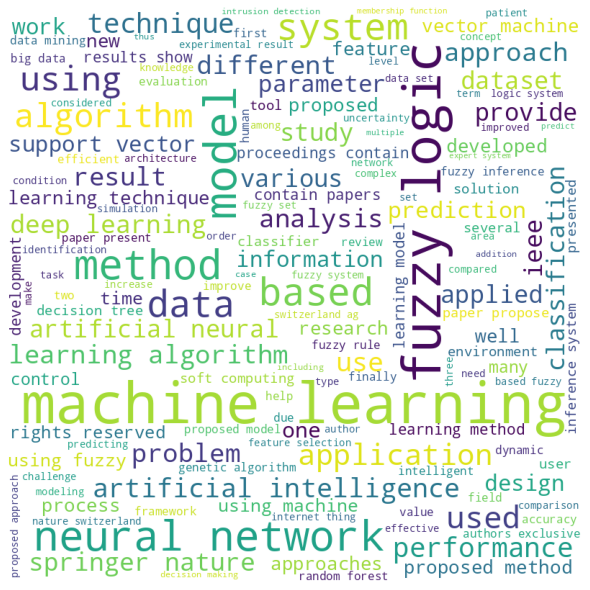

In [ ]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud.to_file("n1.png") 
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.head()

Authors  \
0                           Panda R.R., Nagwani N.K.   
1                           Hasan D.F., Khidhir A.M.   
2  Palangetić M., Cornelis C., Greco S., Słowińsk...   
3  Staroń S., Macioł P., Dubiel B., Gola K., Falk...   
4  Bahramian M., Dereli R.K., Zhao W., Giberti M....   

                                        Author(s) ID  \
0                           56112470500;26639544200;   
1                           58122073900;57225144859;   
2    57209175966;57206712769;26643629100;7005666095;   
3  57555357400;9843127900;55999375600;57214794123...   
4  57214604175;23388687100;58064596800;5721407906...   

                                               Title  Year  \
0  An intuitionistic fuzzy representation based s...  2023   
1  Toward enhancement of deep learning techniques...  2023   
2  Granular approximations: A novel statistical l...  2023   
3  Evolution of δ phase precipitates in Inconel 6...  2023   
4  Data to intelligence: The role of data-driven ...  2023   

                                        Source title Volume Issue Art. No.  \
0  Engineering Applications of Artificial Intelli...    122   NaN   106110   
1  International Journal of Electrical and Comput...     13     3      NaN   
2                               Information Sciences    629   NaN      NaN   
3       Archives of Civil and Mechanical Engineering     23     2       86   
4                   Expert Systems with Applications    217   NaN   119453   

  Page start Page end  ...                                       Affiliations  \
0        NaN      NaN  ...  Department of Computer Science & Engineering, ...   
1       3041     3055  ...  Computer Unit, College Medicine, Mosul Univers...   
2        249      275  ...  Department of Applied Mathematics, Computer Sc...   
3        NaN      NaN  ...  Faculty of Metals Engineering and Industrial C...   
4        NaN      NaN  ...  School of Chemical and Bioprocess Engineering,...   

                           Authors with affiliations  \
0  Panda, R.R., Department of Computer Science & ...   
1  Hasan, D.F., Computer Unit, College Medicine, ...   
2  Palangetić, M., Department of Applied Mathemat...   
3  Staroń, S., Faculty of Metals Engineering and ...   
4  Bahramian, M., School of Chemical and Bioproce...   

                                            Abstract  \
0  In order to improve software reliability and q...   
1  Deep learning has emerged recently as a type o...   
2  Inconsistency in classification and regression...   
3  Experimental and modeling studies of the evolu...   
4  Increasing energy efficiency in wastewater tre...   

                                     Author Keywords  \
0  Intuitionistic fuzzy similarity; Machine learn...   
1  Artificial intelligence; Deep learning; Fuzzy ...   
2  Fuzzy logic; Inconsistencies in data; Rough se...   
3  Additive manufacturing; Annealing; Fuzzy model...   
4  Artificial intelligence; Deep learning; Machin...   

                                      Index Keywords Document Type  \
0  Fuzzy logic; Fuzzy sets; Machine learning; Pro...       Article   
1                                                NaN       Article   
2  Approximation algorithms; Data handling; Fuzzy...       Article   
3  3D printing; Additives; Annealing; Coarsening;...       Article   
4  Decision trees; Deep neural networks; Energy e...        Review   

  Publication Stage Open Access  Source                 EID  
0             Final         NaN  Scopus  2-s2.0-85149731951  
1             Final         NaN  Scopus  2-s2.0-85149102236  
2             Final         NaN  Scopus  2-s2.0-85147606822  
3             Final         NaN  Scopus  2-s2.0-85149014731  
4             Final         NaN  Scopus  2-s2.0-85146253695  

[5 rows x 24 columns]